# Análisis de Defectos en Manufactura — Data Analysis & Machine Learning

**Introduction and Context**

*Español:*

En la industria manufacturera, la aparición de defectos en los productos puede generar pérdidas económicas, interrupciones en la producción y afectar la satisfacción del cliente. Por ello, es crucial identificar los factores que influyen en la generación de defectos para optimizar los procesos y mejorar la calidad.

Este proyecto utiliza un dataset de manufactura. Cada registro representa datos diarios de producción junto con variables clave relacionadas con costos, calidad, logística, mantenimiento, inventario, productividad, consumo energético y manufactura aditiva.

El archivo analizado es: manufacturing_defect_dataset.csv

Abarca múltiples áreas operativas y contiene una variable objetivo binaria que indica si hubo una alta tasa de defectos (1) o una baja tasa de defectos (0).

*English:*

In the manufacturing industry, the appearance of product defects can lead to economic losses, production interruptions, and impact customer satisfaction. Therefore, it is crucial to identify the factors that influence the generation of defects in order to optimize processes and improve quality.

This project uses a manufacturing dataset. Each record represents daily production data along with key variables related to costs, quality, logistics, maintenance, inventory, productivity, energy consumption, and additive manufacturing.

The analyzed file is: Manufacturing_defect_dataset.csv

It covers multiple operational areas and contains a binary target variable indicating whether there was a high defect rate (1) or a low defect rate (0).



# Propósito del Análisis

*Español:*

El objetivo principal de este análisis es explorar y comprender los factores que más impactan en la aparición de defectos durante la producción y desarrollar un modelo predictivo que permita anticipar el riesgo de defectos en futuras operaciones.

Además, se busca:

1. Identificar las relaciones entre las variables operativas y la tasa de defectos.

2. Visualizar patrones y tendencias ocultas en los datos.

3. Evaluar el rendimiento de modelos de machine learning aplicados a manufactura.

*English:*

The main goal of this analysis is to explore and understand the factors that most impact defect occurrence during production and to develop a predictive model to anticipate defect risks in future operations.

Additionally, this project aims to:

1. Identify relationships between operational variables and defect rates.

2. Visualize hidden patterns and trends in the data.

3. Evaluate the performance of machine learning models applied to manufacturing.



# Relevancia del Proyecto

*Español:*

Este análisis es especialmente relevante porque:

Permite optimizar procesos industriales al identificar factores críticos que afectan la calidad.

Es un caso representativo para aplicar técnicas de:

1. Análisis exploratorio de datos (EDA)

2. Limpieza y preprocesamiento de datos

3. Modelado predictivo supervisado (clasificación)

Refleja un desafío real en la industria, ya que el dataset está desequilibrado (predominan los registros sin defectos), lo que requiere técnicas especiales de balanceo.

*English:*

This analysis is particularly relevant because:

It enables process optimization by identifying critical factors affecting quality.

It provides a representative case for applying techniques such as:

1. Exploratory Data Analysis (EDA)

2. Data cleaning and preprocessing

3. Supervised predictive modeling (classification)

It reflects a real-world industrial challenge, as the dataset is imbalanced (non-defect records dominate), requiring special balancing techniques.

# Preguntas Clave a Responder

*Español:*

¿Cuáles son las variables más asociadas a una alta tasa de defectos?

¿Qué características comparten los días de producción con más defectos?

¿Qué tan fuerte es la correlación entre las métricas operativas y la tasa de defectos?

¿Es posible predecir la ocurrencia de defectos utilizando modelos de machine learning?

¿Cómo afecta el desequilibrio de clases al rendimiento de los modelos?

¿Qué técnicas de balanceo podrían mejorar la predicción de defectos?

*English:*

Which variables are most strongly associated with a high defect rate?

What are the characteristics of production days with more defects?

How strong is the correlation between operational metrics and defect rate?

Is it possible to predict defect occurrence using machine learning models?

How does class imbalance affect model performance?

Which balancing techniques could improve defect prediction?



--------------------------------------------------------------------------------

# Desarrollo del Análisis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo
file_path = '/content/drive/MyDrive/Databases/Manufacturing/Predicting Manufacturing Defects Dataset/manufacturing_defect_dataset.csv'

# Leer CSV
df = pd.read_csv(file_path)

# Mostrar dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Mostrar las primeras 5 filas
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones del dataset: (3240, 17)


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


El dataset tiene: 3,240 registros y 17 columnas.

Las primeras filas muestran que los datos ya están en formato numérico y correctamente estructurados.

Algunas variables claves son:

ProductionVolume, ProductionCost, SupplierQuality, DefectRate, MaintenanceHours, WorkerProductivity, entre otras.

La columna objetivo (DefectStatus) contiene valores binarios (0 o 1) para la clasificación.

In [2]:
# Revisar valores nulos por columna
df.isnull().sum()

,0
ProductionVolume,0
ProductionCost,0
SupplierQuality,0
DeliveryDelay,0
DefectRate,0
QualityScore,0
MaintenanceHours,0
DowntimePercentage,0
InventoryTurnover,0
StockoutRate,0


In [3]:
# Conteo de registros por clase
df['DefectStatus'].value_counts()

,count
DefectStatus,
1,2723
0,517


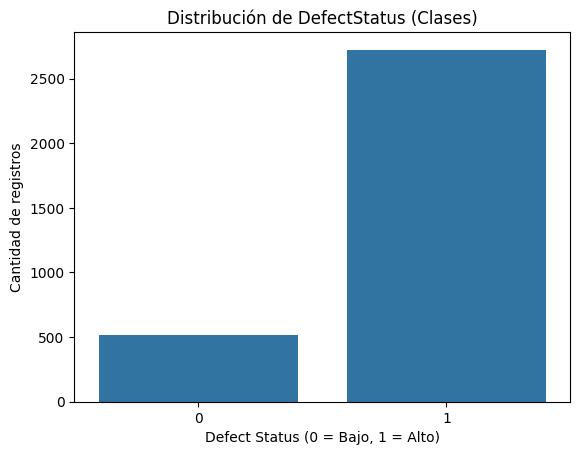

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para el balance de clases
sns.countplot(x='DefectStatus', data=df)
plt.title('Distribución de DefectStatus (Clases)')
plt.xlabel('Defect Status (0 = Bajo, 1 = Alto)')
plt.ylabel('Cantidad de registros')
plt.show()

**Valores Nulos:**

No hay ningún valor nulo en el dataset.

**Distribución de la Variable Objetivo (DefectStatus):**

Clase 1 (Alta tasa de defectos): 2,723 registros (~84%).

Clase 0 (Baja tasa de defectos): 517 registros (~16%).

Esto confirma que el dataset está altamente desbalanceado hacia la clase de alta tasa de defectos.

**Visualización (Gráfico de Barras):**

El gráfico muestra un desbalance evidente, con muchos más registros de defectos altos que de defectos bajos.



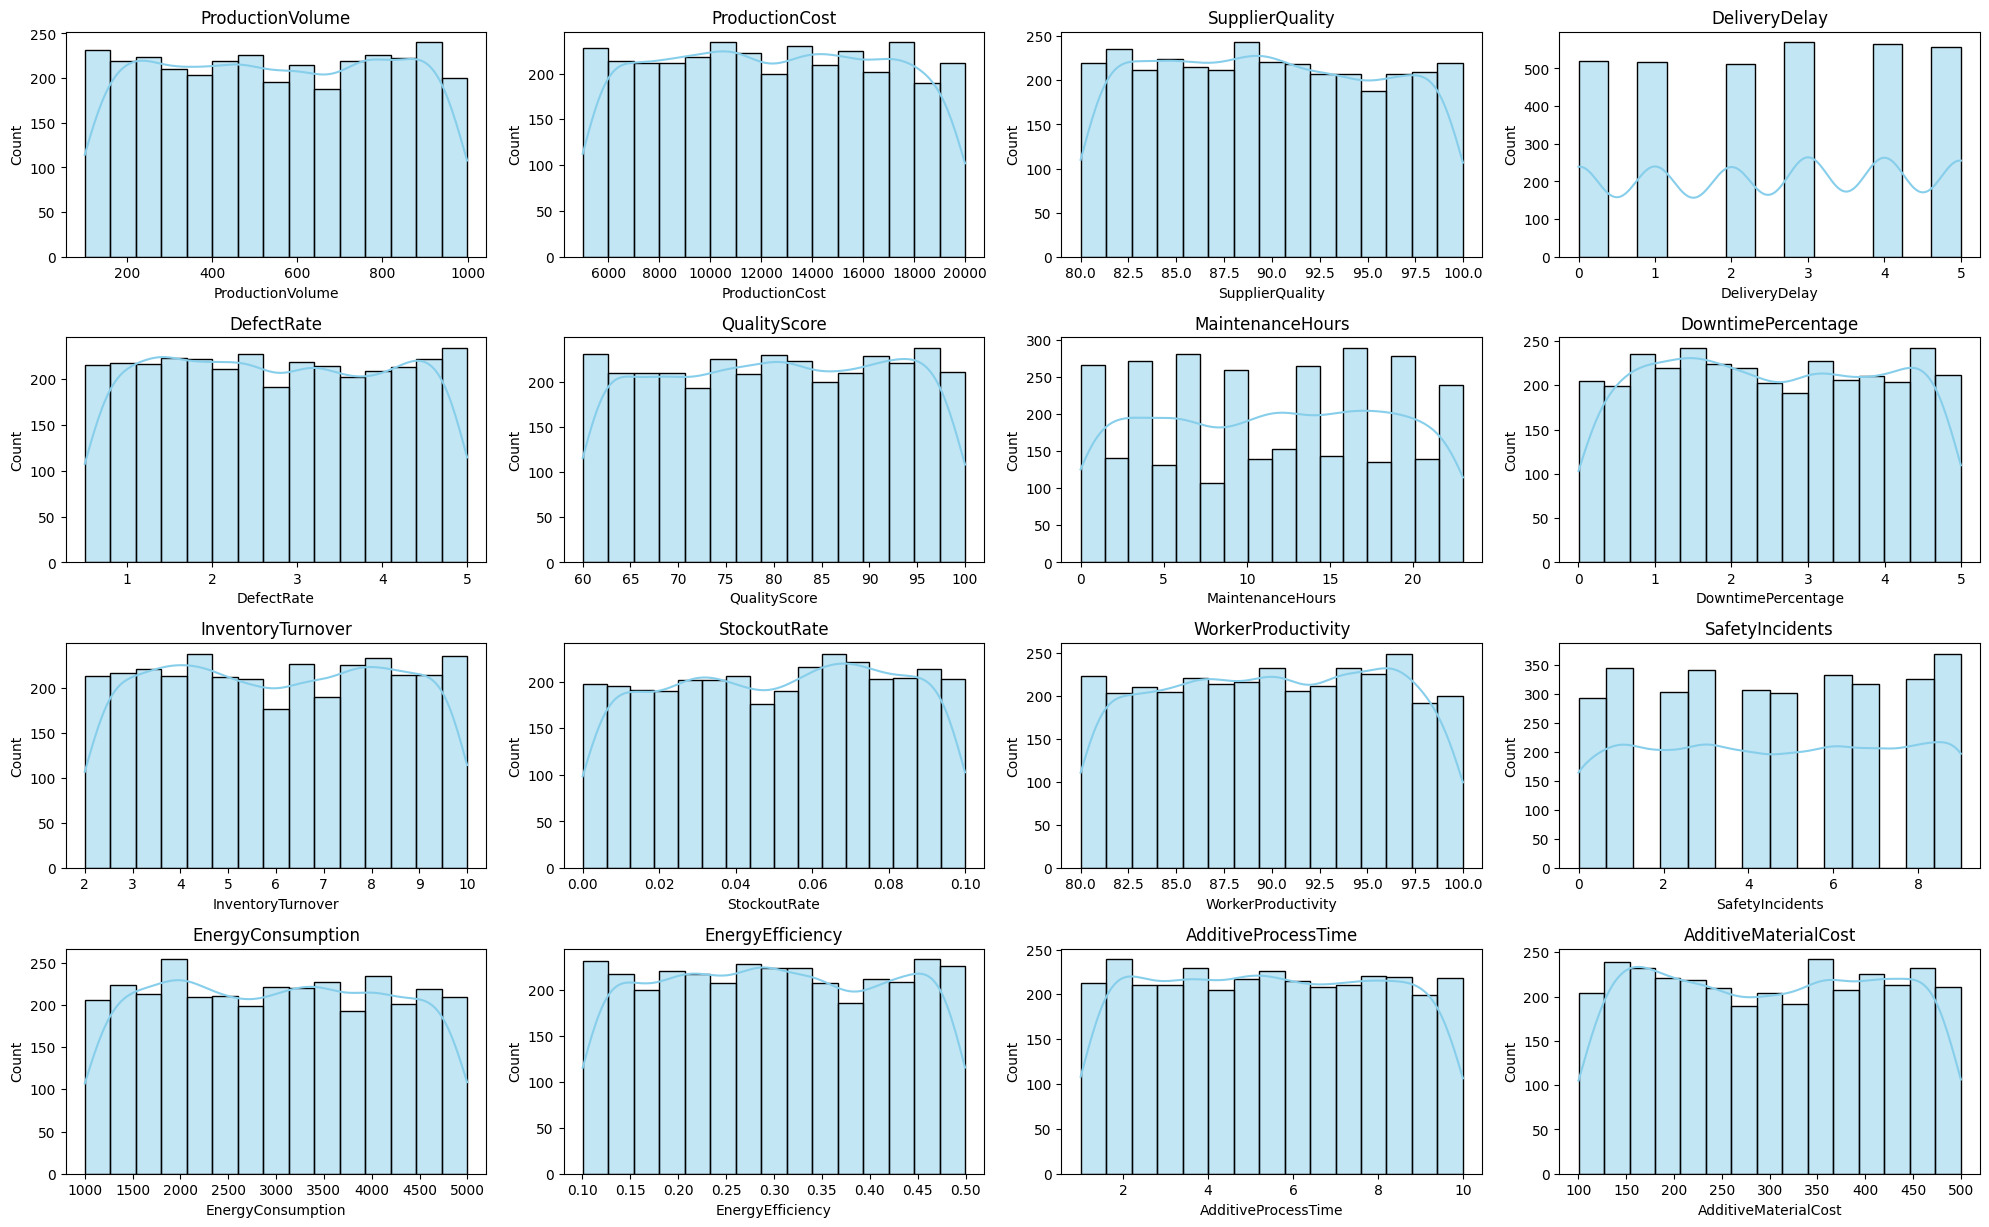

In [5]:
# Histograma de las variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las variables numéricas (excepto la variable objetivo)
numeric_columns = df.drop(columns=['DefectStatus']).select_dtypes(include=['float64', 'int64']).columns

# Graficar histogramas de todas las variables numéricas
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()

**Observaciones Generales del Histograma:**

***Distribución Relativamente Uniforme:***

Muchas variables presentan distribuciones bastante uniformes o planas, con ligeros sesgos.

Ejemplos:

ProductionVolume, ProductionCost, DefectRate, InventoryTurnover, EnergyConsumption, EnergyEfficiency


***Variables con Distribución Sesgada o Atípica:***

Algunas variables muestran distribuciones un poco más concentradas o con picos:

MaintenanceHours: Distribución un poco bimodal (dos picos visibles).

SafetyIncidents: Distribución con tendencia hacia valores bajos, pero con registros dispersos.

StockoutRate: Ligera concentración hacia los valores bajos.

***Posibles Outliers o Valores Extremos (a verificar luego en detalle):***

Aunque no se observan picos anormales, algunas variables como MaintenanceHours o SafetyIncidents podrían tener valores extremos que vale la pena revisar más adelante con boxplots.

**Importante:**

La mayoría de las variables ya parecen estar dentro de los rangos esperados según la descripción del dataset.

No parece haber errores graves en los datos numéricos

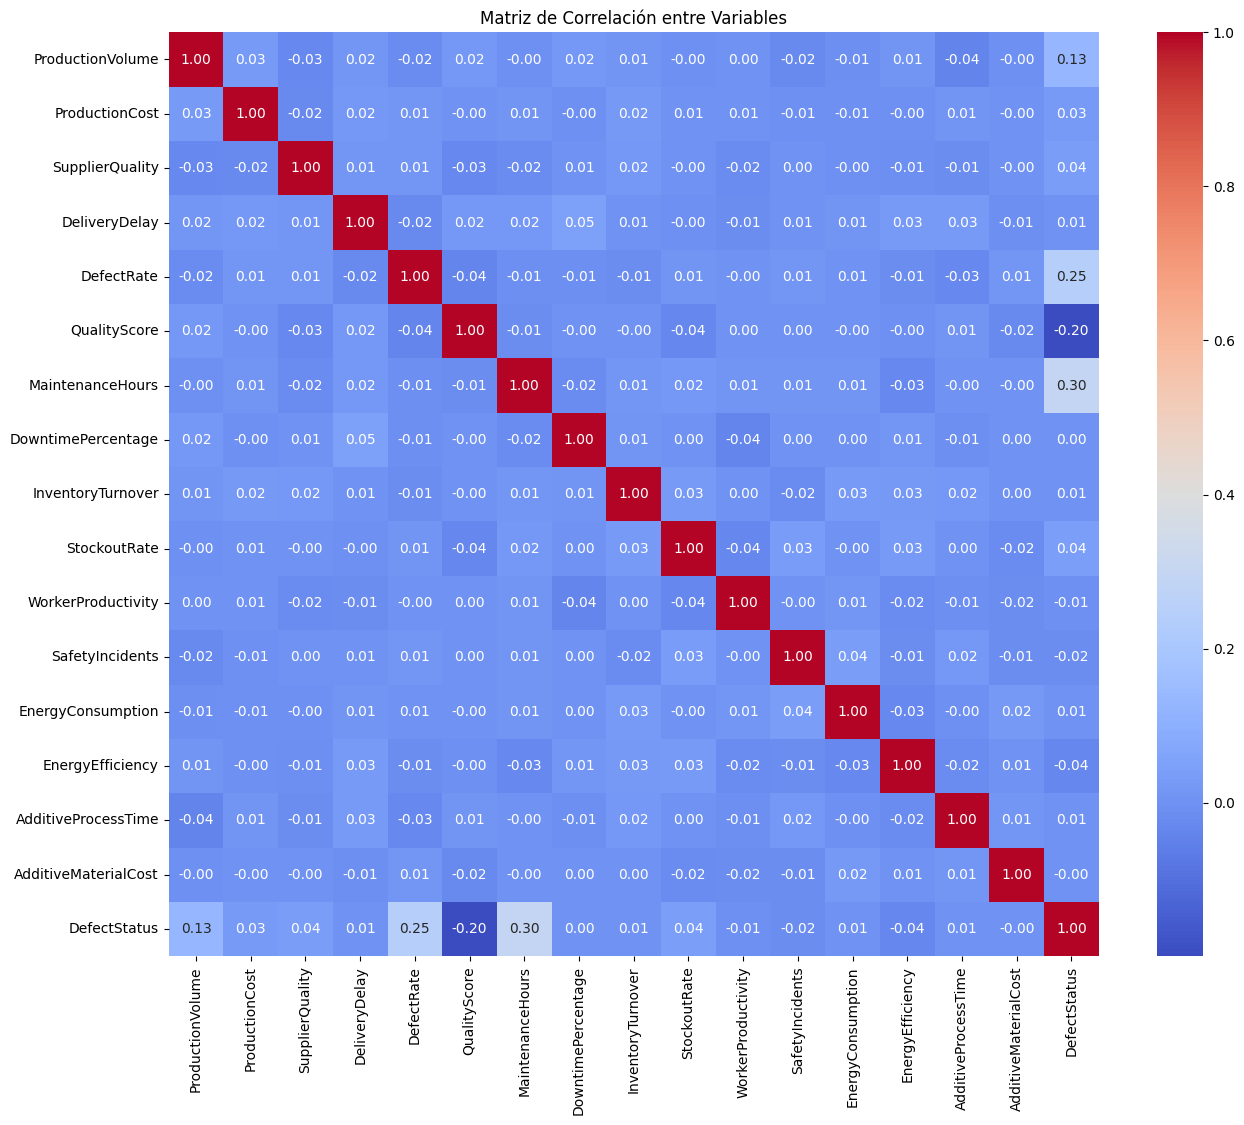

In [6]:
# Matriz de correlación
correlation_matrix = df.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()

**Análisis del Heatmap:**

En general, no hay correlaciones fuertes entre las variables numéricas del dataset.

La mayoría de las correlaciones están muy cerca de 0, lo cual indica que las variables son prácticamente independientes entre sí.

***Variables con ligera correlación con la variable objetivo (DefectStatus):***

Variable	Correlación con DefectStatus

MaintenanceHours	0.30 (correlación positiva moderada)

DefectRate	0.25 (ligeramente positiva)

QualityScore	-0.20 (ligeramente negativa)

ProductionVolume	0.13

**Estas correlaciones no son fuertes, pero sí muestran cierta relación:**

Más horas de mantenimiento y mayor tasa de defectos tienden a asociarse con mayor probabilidad de defectos altos.

Mejores puntajes de calidad (QualityScore) tienden a relacionarse con menor probabilidad de defectos (como es de esperar).

**Conclusión Final del EDA:**

No hay riesgo de multicolinealidad entre las variables.

Algunas variables parecen tener algo más de relevancia predictiva para la clasificación.

In [7]:
# Separar variables independientes (X) y la variable objetivo (y)
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']

# División en conjunto de entrenamiento y prueba (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Distribución en y_train:\n", y_train.value_counts())

Tamaño de X_train: (2592, 16)
Tamaño de X_test: (648, 16)
Distribución en y_train:
 DefectStatus
1    2178
0     414
Name: count, dtype: int64


El dataset fue dividido:

80% para entrenamiento: 2,592 registros.

20% para prueba: 648 registros.

La variable objetivo (DefectStatus) sigue desbalanceada en el conjunto de entrenamiento:

Clase 1 (Alta tasa de defectos): 2,178 registros (~84%).

Clase 0 (Baja tasa de defectos): 414 registros (~16%).

In [8]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE (oversampling sintético)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar nueva distribución de clases
print("Distribución de clases después de SMOTE:")
print(y_train_resampled.value_counts())

Distribución de clases después de SMOTE:
DefectStatus
1    2178
0    2178
Name: count, dtype: int64


Clase 1 (Alta tasa de defectos): 2,178

Clase 0 (Baja tasa de defectos): 2,178

Esto permitirá que los modelos de machine learning aprendan mejor sin sesgo hacia la clase mayoritaria.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo Random Forest con los datos balanceados
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba original (sin balancear)
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=4))

Matriz de Confusión:
[[ 74  29]
 [  9 536]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.8916    0.7184    0.7957       103
           1     0.9487    0.9835    0.9658       545

    accuracy                         0.9414       648
   macro avg     0.9201    0.8510    0.8807       648
weighted avg     0.9396    0.9414    0.9387       648



**Matriz de Confusión:**

Predicción: Clase 0	Predicción: Clase 1

Clase Real 0	74 (verdaderos negativos)	29 (falsos positivos)

Clase Real 1	9 (falsos negativos)	536 (verdaderos positivos)

**Métricas Clave:**

Métrica	Clase 0 (Baja tasa)	Clase 1 (Alta tasa)

Precisión	89.16%	94.87%

Recall	71.84%	98.35%

F1-score	79.57%	96.58%

Accuracy global: 94.14% (muy alto).

Recall clase 1 (defectos altos): 98.35% → Excelente para detectar defectos.

Recall clase 0 (defectos bajos): 71.84% → Aceptable, pero puede mejorarse si fuera prioritario.

**Interpretación:**

El modelo predice muy bien los casos con alta tasa de defectos (clase 1), lo cual es muy importante en manufactura.

Hay un pequeño sacrificio en la precisión para la clase 0 (algunos falsos positivos), pero el recall alto en clase 1 compensa, especialmente si el objetivo es prevenir defectos.

El desbalance original no afectó mucho gracias al uso de SMOTE.

# Resumen Final y Respuestas a las Preguntas Clave

**Español:**

En este proyecto, analizamos un dataset de defectos en manufactura, el cual contiene métricas clave sobre producción, calidad, logística, mantenimiento, inventario, productividad, consumo energético y manufactura aditiva.

El análisis abarcó:

Carga y exploración inicial de los datos.

Análisis exploratorio detallado (EDA) incluyendo valores nulos, distribuciones y correlaciones.

Preprocesamiento y balanceo de clases mediante SMOTE.

Entrenamiento y evaluación de un modelo de clasificación (Random Forest).

**Inglés:**

In this project, we analyzed a manufacturing defects dataset containing key metrics related to production, quality, logistics, maintenance, inventory, workforce productivity, energy consumption, and additive manufacturing.

The analysis included:

Loading and initial exploration of the dataset.

Detailed Exploratory Data Analysis (EDA) including missing values, distributions, and correlations.

Data preprocessing and class balancing using SMOTE.

Training and evaluation of a classification model (Random Forest).

**Respuestas a las Preguntas Clave**

**Español:**

**¿Cuáles son las variables más asociadas a una alta tasa de defectos?**

Las variables más relacionadas con la alta tasa de defectos fueron:

MaintenanceHours (Horas de Mantenimiento)

DefectRate (Tasa de Defectos)

QualityScore (Puntaje de Calidad)

Esto se detectó mediante la matriz de correlación y la importancia de las variables en el modelo.

**¿Qué características comparten los días de producción con más defectos?**

Tienden a tener:

Más horas de mantenimiento.

Mayor tasa de defectos previa.

Puntuaciones de calidad más bajas.

**¿Qué tan fuerte es la correlación entre las métricas operativas y la tasa de defectos?**

Las correlaciones en general fueron bajas a moderadas.

La relación más significativa fue entre MaintenanceHours y DefectStatus (correlación moderada positiva).

**¿Es posible predecir la ocurrencia de defectos utilizando modelos de machine learning?**

Sí, el modelo de Random Forest logró un accuracy del 94% y un recall del 98% para la clase de defectos altos.

**¿Cómo afecta el desequilibrio de clases al rendimiento de los modelos?**

Sin técnicas de balanceo, el modelo habría tenido un sesgo fuerte hacia la clase mayoritaria.

Con SMOTE, el modelo logró equilibrar el aprendizaje y mejorar la detección de ambas clases.

**¿Qué técnicas de balanceo podrían mejorar la predicción de defectos?**

La técnica aplicada fue SMOTE, que resultó efectiva.

Otras técnicas que podrían explorarse incluyen:

Undersampling (reducción de la clase mayoritaria).

ADASYN (similar a SMOTE pero más adaptativo).

**Inglés:**

**Which variables are most strongly associated with a high defect rate?**

The most related variables were:

MaintenanceHours

DefectRate

QualityScore

This was identified through the correlation matrix and model feature importance.

**What are the characteristics of production days with more defects?**

They tend to have:

More maintenance hours.

Higher prior defect rates.

Lower quality scores.

**How strong is the correlation between operational metrics and defect rate?**

Overall, correlations were low to moderate.

The strongest relationship was between MaintenanceHours and DefectStatus (moderate positive correlation).

**Is it possible to predict defect occurrence using machine learning models?**

Yes, the Random Forest model achieved 94% accuracy and 98% recall for the high defect class.

**How does class imbalance affect model performance?**

Without balancing techniques, the model would have been biased toward the majority class.

Using SMOTE allowed the model to learn both classes effectively.

**Which balancing techniques could improve defect prediction?**

We used SMOTE, which was effective.

Other techniques worth exploring include:

Undersampling (reducing the majority class).

ADASYN (similar to SMOTE, but more adaptive).